In [2]:
import os
import numpy as np
import torch
import matplotlib.pyplot as plt
from PIL import Image
import cv2

In [4]:
np.random.seed(3)

def show_anns(anns, borders=True):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:, :, 3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.5]])
        img[m] = color_mask 
        if borders:
            import cv2
            contours, _ = cv2.findContours(m.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 
            # Try to smooth contours
            contours = [cv2.approxPolyDP(contour, epsilon=0.01, closed=True) for contour in contours]
            cv2.drawContours(img, contours, -1, (0, 0, 1, 0.4), thickness=1) 

    ax.imshow(img)

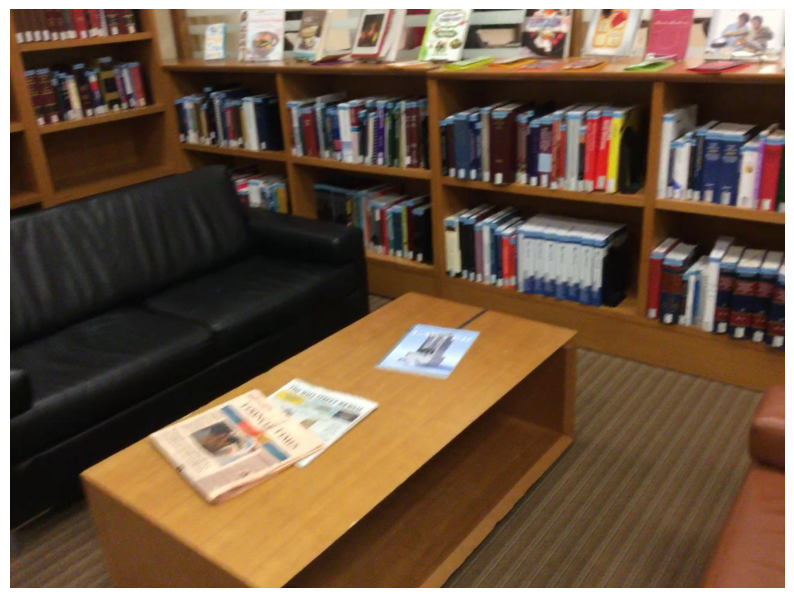

In [101]:
image = Image.open('../../data/scannet/ssfm_valid/scene0064_00/photos/120.jpg')
image = np.array(image.convert("RGB"))

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()

In [91]:
from sam2.build_sam import build_sam2
from sam2.automatic_mask_generator import SAM2AutomaticMaskGenerator

sam2_checkpoint = "../../semantic_SfM/sam2/sam2.1_hiera_large.pt"
model_cfg = "configs/sam2.1/sam2.1_hiera_l.yaml"

# device = torch.device("cuda")
device = torch.device("cuda:0")

sam2 = build_sam2(model_cfg, sam2_checkpoint, device=device, apply_postprocessing=False)

In [115]:
mask_generator_2 = SAM2AutomaticMaskGenerator(
    model=sam2,
    points_per_side=8,
    points_per_batch=128,
    pred_iou_thresh=0.6,
    #stability_score_thresh=0.96,
    stability_score_offset=0.5,
    #mask_threshold = 0.0,
    #crop_n_layers=2,
    box_nms_thresh=0.6,
    #crop_n_points_downscale_factor=1,
    #min_mask_region_area=100000.0,
    use_m2m=True,
    #multimask_output=True,
)

In [116]:
masks2 = mask_generator_2.generate(image)
print(len(masks2))

21


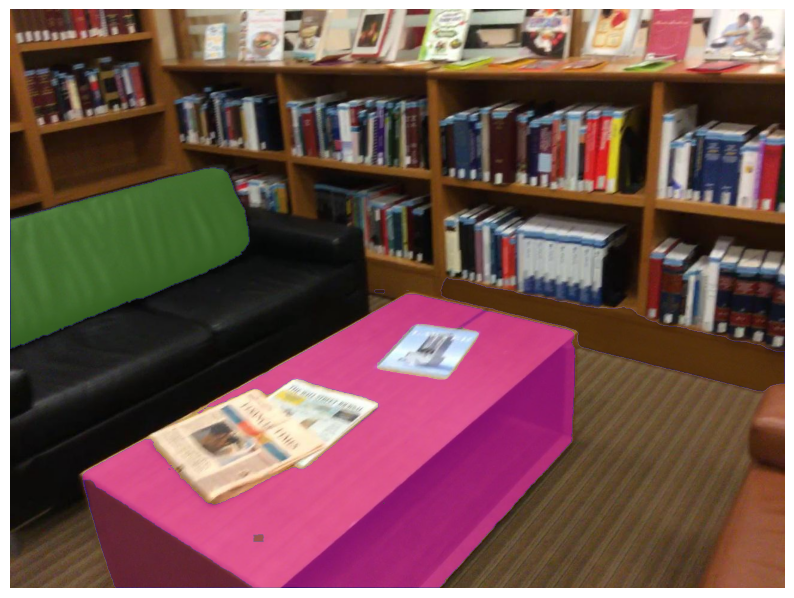

In [114]:
plt.figure(figsize=(10, 10))
plt.imshow(image)
show_anns(masks2)
plt.axis('off')
plt.show() 